# Task 1 - User Overview analysis 

In [792]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.express as px

In [793]:
import os, sys
sys.path.insert(0,'../scripts/')
from Data_exploration import *
from data_preprocess import Data_preprocess
from Display_data import DataFrame

Loading cleaned Telecom dataset

In [794]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
telcom = pd.read_csv('../data/cleaned_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
telcom.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/cleaned_data.csv'

The column names, how many data points,number of colum etc. All these questions needs to be answered

In [ ]:
#info of columns
telcom.info()

In [ ]:
#describe the columns data
telcom.describe()

In [ ]:
telcom.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# column names
telcom[['Dur. (ms).1']].describe()

For better understanding of the columns, exploring the data description [here](https://github.com/BirhanuGebisa/Telecom-User-Analytics/blob/telcom/data/Field%20Descriptions.xlsx) will help

In [ ]:
# number of data points
print(f" There are {telcom.shape[0]} rows and {telcom.shape[1]} columns")

### Full User Overview analysis & the following sub-tasks
 Identify 
  - Top 10 handsets used by the customers
  - Top 3 handset manufacturers
  - Top 5 handsets per top 3 handset manufacturer
### Interpretation and recommendation to marketing teams

### Top 10 handsets used by the customers

In [ ]:
#Top 10 handsets used by the customers
handset_type= telcom['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

### Top 3 handset manufacturers

In [ ]:
#
Handset_manu = telcom['Handset Manufacturer'].value_counts()[0:3]
Handset_manu.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manu

### Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

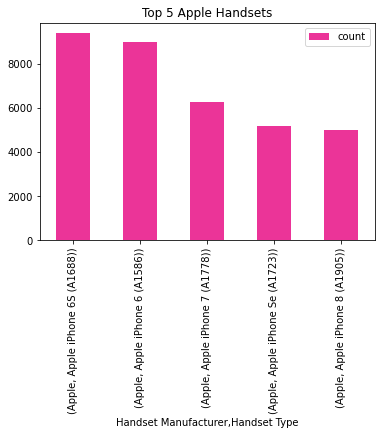

In [795]:
#Top apple manufacturer handset
top_apple = telcom.loc[telcom['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#eb3498')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

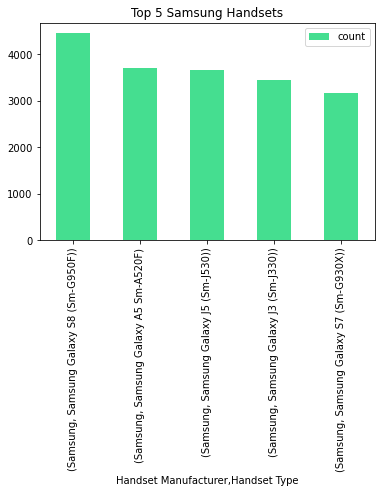

In [796]:
#Top samsung manufacturer handset
top_samsung = telcom.loc[telcom['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#45De90')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

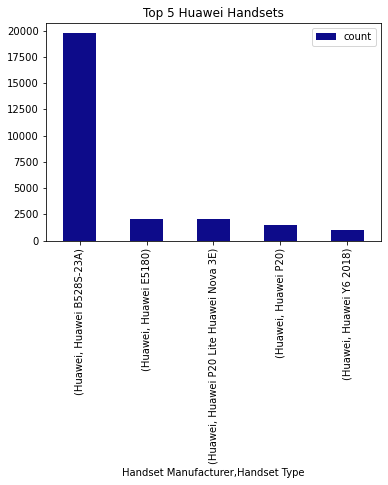

In [797]:
#Top huawei manufacturer handset
top_huawei = telcom.loc[telcom['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#0d0b8a')
top_huawei

#### Conclusion of the Analysis shows:

- The most used handset model by customer is Huawei B528S-23A which is manufactured by Huawei
- The top 3 handset manufacturers first Apple total of 59339, second Samsung total of 40429, and third Huawei total of 34296
- Apple's Handset are not prefered by more customers and Samsung manufacturers also the same with apple's.
- Huawei Handsets manufacturers can be recommended to increase the manufacturing capability to increase there acces to customers.

In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. 
So here, consider xDR as data sessions Detail Record. 
In xDR, user behavior can be tracked through the following applications:  
Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
- Aggregate per user the following information in the column  
   - number of xDR sessions
   - Session duration
   - the total download (DL) and upload (UL) data
   - the total data volume (in Bytes) during this session for each application

### Non-Graphical Univariate Analysis and Graphical Univariate Analysis

#### Number of xDR sessions

In [798]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

In [799]:
data=DataFrame(telcom)

### Aggregation of Total Downloads and Uploads

In [800]:
# Aggregation of Total values
telcom["Total Uploads"]=telcom["Google UL (Bytes)"]+telcom["Email UL (Bytes)"]+telcom["Social Media UL (Bytes)"]+telcom["Youtube UL (Bytes)"]+telcom["Netflix UL (Bytes)"]+telcom["Gaming UL (Bytes)"]+telcom["Other UL (Bytes)"]
telcom["Total Downloads"]=telcom["Google DL (Bytes)"]+telcom["Email DL (Bytes)"]+telcom["Social Media DL (Bytes)"]+telcom["Youtube DL (Bytes)"]+telcom["Netflix DL (Bytes)"]+telcom["Gaming DL (Bytes)"]+telcom["Other DL (Bytes)"]
telcom['Total UL and DL']=telcom['Total DL (Bytes)']+telcom["Total UL (Bytes)"]

In [801]:
avg_time_per_user = telcom.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'mean'})
avg_time_per_user.rename(columns={'Dur. (ms).1': 'Average session duration (ms)'}, inplace=True)
avg_time_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
"33,669,260,221.00","1,573,420,996.00"
"33,661,715,300.00","1,480,875,272.00"
"33,607,498,825.00","1,474,663,399.00"
"33,762,601,828.00","1,375,612,670.00"
"33,760,627,129.00","1,361,762,651.00"
"33,761,667,219.00","1,357,643,593.00"
"33,750,343,200.00","1,321,509,685.00"
"33,666,816,945.00","1,299,381,954.00"
"33,698,695,185.00","1,209,607,515.25"


### Total Uploads and  Downloads data per user

In [802]:
total_user = telcom.groupby('MSISDN/Number')[[ 'Total Uploads', 'Total Downloads', 'Total UL and DL']].sum()
total_user.nlargest(10, 'Total UL and DL')

,Total Uploads,Total Downloads,Total UL and DL
MSISDN/Number,,,
"33,614,892,860.00","689,483,001.00","15,652,041,034.00","8,846,226,494.00"
"33,760,536,639.00","703,478,581.00","12,401,333,662.00","8,514,773,963.00"
"33,625,779,332.00","729,577,380.00","13,971,695,950.00","8,499,620,722.00"
"33,626,320,676.00","669,650,721.00","15,326,993,371.00","7,971,167,261.00"
"33,675,877,202.00","581,568,792.00","13,974,615,530.00","7,891,110,608.00"
"33,659,725,664.00","624,260,321.00","13,264,153,039.00","7,705,862,783.00"
"33,666,464,084.00","405,060,976.00","11,165,644,640.00","7,308,500,938.00"
"33,760,413,819.00","521,518,890.00","10,599,355,681.00","7,132,370,514.00"
"33,664,712,899.00","471,244,453.00","10,269,410,663.00","6,872,018,208.00"


#### Univariate analysis

In [803]:
#getting the number of xDR sessions
telcom[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,"148,506.00"
mean,"105,084,600.60"
std,"81,072,729.72"
min,"7,142,988.00"
25%,"58,249,644.50"
50%,"86,399,986.00"
75%,"132,933,303.50"
max,"1,859,336,442.00"


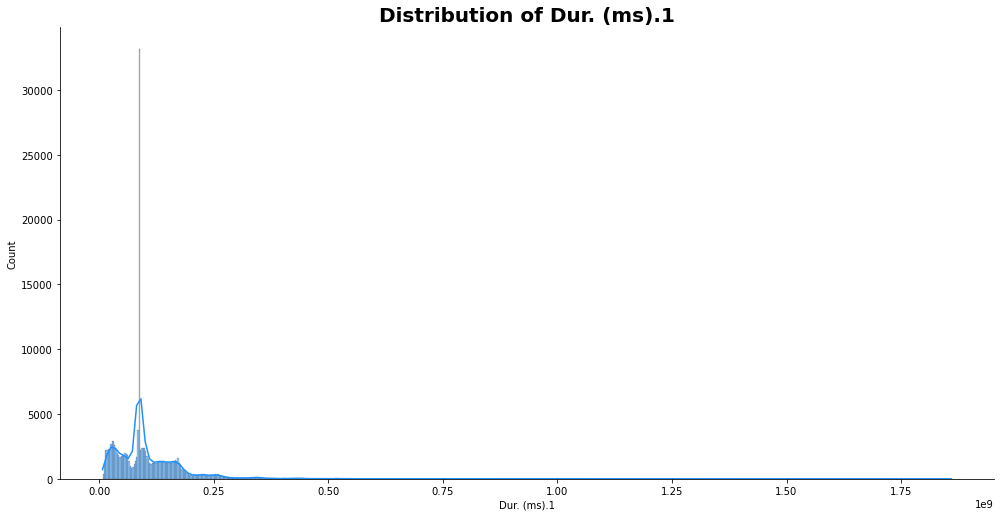

In [804]:
plot_hist(telcom, 'Dur. (ms).1', 'dodgerblue')

#### Total Upload MegaBytes

In [805]:
telcom[['Total UL (Bytes)']].describe()

,Total UL (Bytes)
count,"148,506.00"
mean,"41,119,372.80"
std,"11,278,441.20"
min,"2,866,892.00"
25%,"33,218,278.00"
50%,"41,141,959.50"
75%,"49,032,524.00"
max,"78,331,311.00"


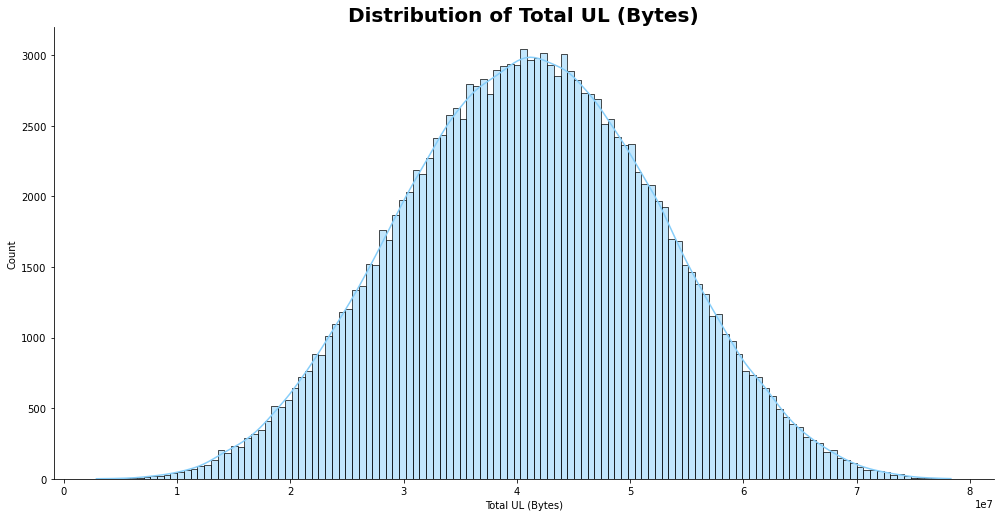

In [806]:
plot_hist(telcom, 'Total UL (Bytes)', '#87CEFA')

#### Total Downloads Megabytes

In [807]:
telcom[['Total DL (Bytes)']].describe()

,Total DL (Bytes)
count,"148,506.00"
mean,"454,664,032.00"
std,"244,179,073.24"
min,"7,114,041.00"
25%,"243,126,304.25"
50%,"455,940,800.50"
75%,"665,754,159.25"
max,"902,969,616.00"


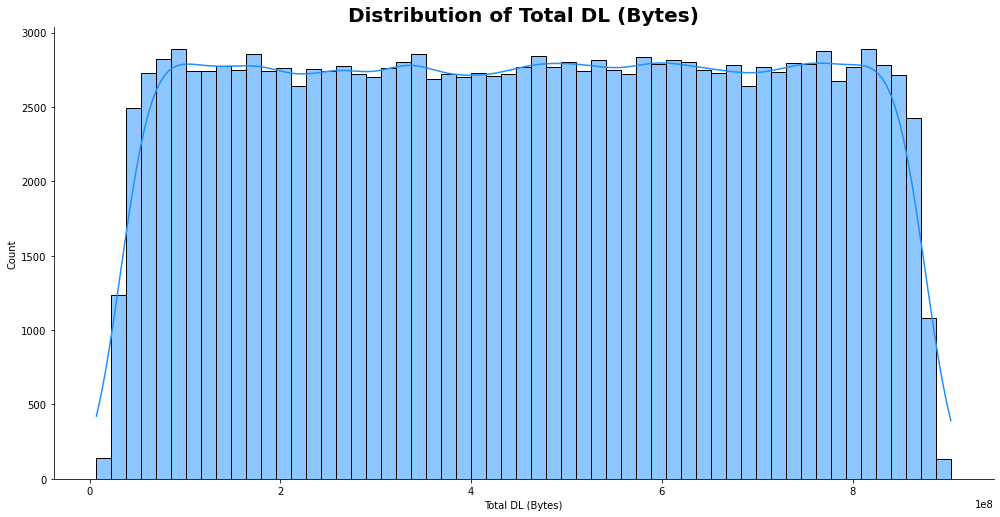

In [808]:
plot_hist(telcom, 'Total DL (Bytes)', '#1E90FF')

In [809]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

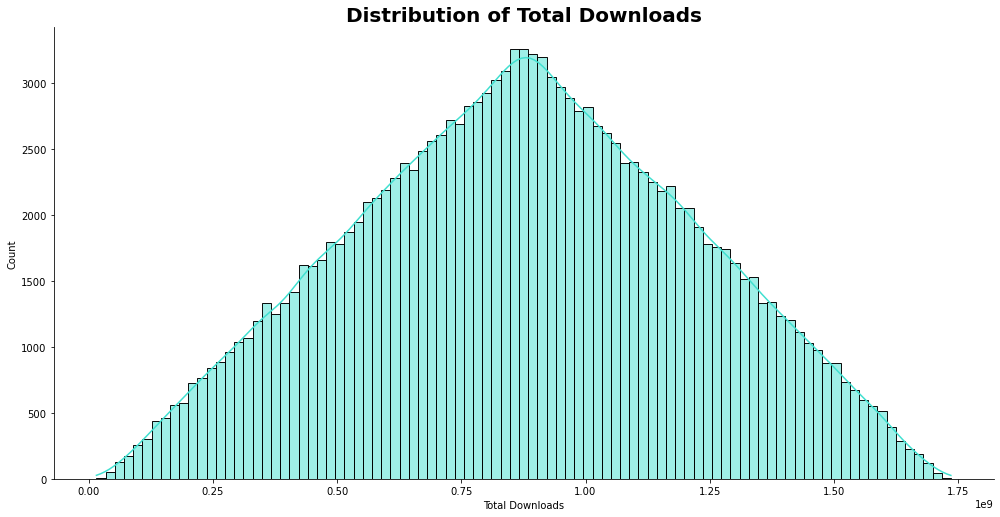

In [810]:
plot_hist(telcom, 'Total Downloads', '#40E0D0')

### Aggregation of Total Social Media data

In [811]:
# Aggregation of Total Social Media data
telcom["Youtube_Total_Data"]=telcom["Youtube DL (Bytes)"]+telcom["Youtube UL (Bytes)"]
telcom["Google_Total_Data"]=telcom["Google DL (Bytes)"]+telcom["Google UL (Bytes)"]
telcom["Email_Total_Data"]=telcom["Email DL (Bytes)"]+telcom["Email UL (Bytes)"]
telcom["Social_Media_Total_Data"]=telcom["Social Media DL (Bytes)"]+telcom["Social Media UL (Bytes)"]
telcom["Netflix_Total_Data"]=telcom["Netflix DL (Bytes)"]+telcom["Netflix UL (Bytes)"]
telcom["Gaming_Total_Data"]=telcom["Gaming DL (Bytes)"]+telcom["Gaming UL (Bytes)"]
telcom["Other_Total_Data"]=telcom["Other DL (Bytes)"]+telcom["Other UL (Bytes)"]

### Total UL and DL volumne of Mega Bytes each application per user

In [812]:
total_user = telcom.groupby('MSISDN/Number')[[ 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']].sum()
total_user.nlargest(10, 'Total UL and DL')

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
"33,614,892,860.00","394,370,218.00","127,973,787.00","40,788,634.00","28,294,544.00","361,401,046.00","7,749,432,234.00","7,639,263,572.00","8,846,226,494.00"
"33,760,536,639.00","396,289,198.00","123,223,099.00","33,693,767.00","39,783,189.00","334,643,269.00","7,461,045,228.00","4,716,134,493.00","8,514,773,963.00"
"33,625,779,332.00","452,958,769.00","142,307,915.00","40,633,966.00","27,135,500.00","356,980,607.00","7,326,673,487.00","6,354,583,086.00","8,499,620,722.00"
"33,626,320,676.00","374,483,047.00","152,191,852.00","42,418,782.00","43,374,779.00","328,725,740.00","6,887,572,116.00","8,167,877,776.00","7,971,167,261.00"
"33,675,877,202.00","317,410,572.00","109,860,502.00","31,514,421.00","19,222,921.00","309,093,159.00","6,970,567,597.00","6,798,515,150.00","7,891,110,608.00"
"33,659,725,664.00","257,991,088.00","116,516,345.00","35,999,792.00","35,412,358.00","399,519,079.00","6,725,559,211.00","6,317,415,487.00","7,705,862,783.00"
"33,666,464,084.00","227,336,012.00","89,320,737.00","25,557,139.00","18,629,986.00","214,416,926.00","6,646,303,338.00","4,349,141,478.00","7,308,500,938.00"
"33,760,413,819.00","303,169,107.00","82,738,720.00","25,576,965.00","20,777,205.00","318,347,546.00","6,268,619,592.00","4,101,645,436.00","7,132,370,514.00"
"33,664,712,899.00","276,834,013.00","90,389,372.00","21,426,007.00","19,390,599.00","251,798,809.00","6,103,856,008.00","3,976,960,308.00","6,872,018,208.00"


#### Social Media Total Upload and Download Data

In [813]:
telcom["Social_Media_Total_Data"].describe()

count     148,506.00
mean    1,828,066.19
std     1,035,637.84
min         1,563.00
25%       932,182.75
50%     1,825,931.00
75%     2,727,493.00
max     3,650,861.00
Name: Social_Media_Total_Data, dtype: float64

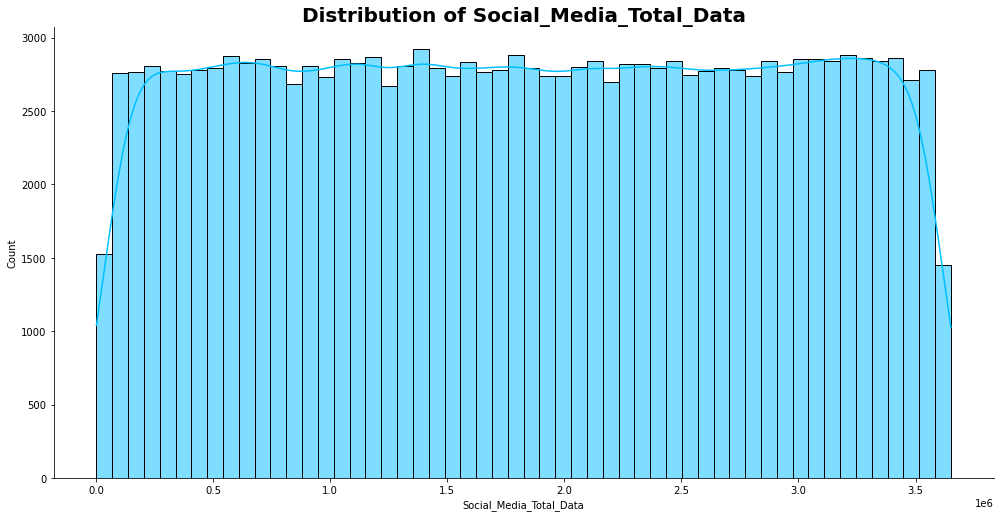

In [814]:
plot_hist(telcom, 'Social_Media_Total_Data', '#00BFFF')

#### Google Total Data

In [815]:
telcom[['Google_Total_Data']].describe()

,Google_Total_Data
count,"148,506.00"
mean,"7,808,062.88"
std,"3,516,724.32"
min,"40,330.00"
25%,"4,944,994.00"
50%,"7,815,669.00"
75%,"10,683,066.25"
max,"15,528,782.00"


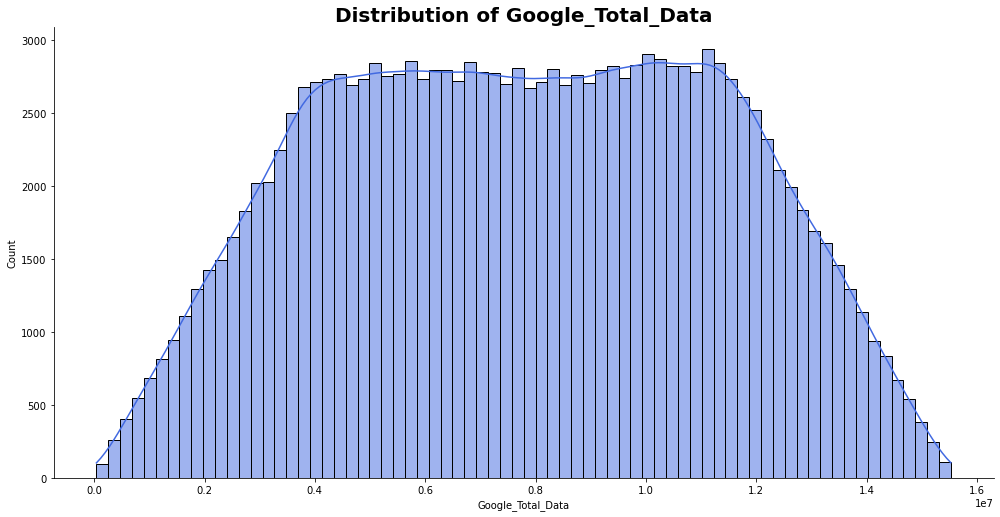

In [816]:
plot_hist(telcom, 'Google_Total_Data', '#4169E1')

#### Total Email Data

In [817]:
telcom[['Email_Total_Data']].describe()

,Email_Total_Data
count,"148,506.00"
mean,"2,259,188.18"
std,"1,071,151.94"
min,"8,359.00"
25%,"1,359,336.25"
50%,"2,264,186.00"
75%,"3,160,024.50"
max,"4,518,036.00"


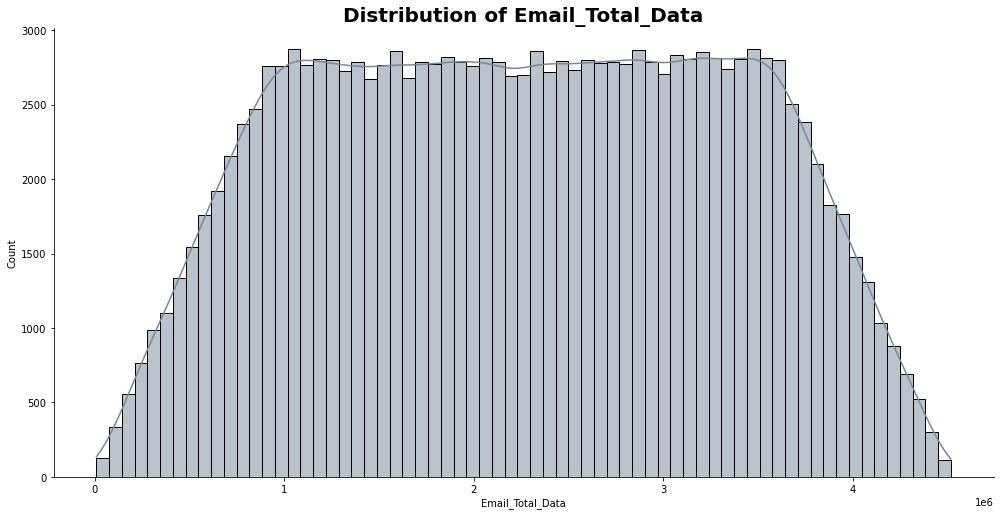

In [818]:
plot_hist(telcom, 'Email_Total_Data', '#778899')

Total Youtube Data

In [819]:
telcom[['Youtube_Total_Data']].describe()

,Youtube_Total_Data
count,"148,506.00"
mean,"22,642,436.13"
std,"9,247,683.87"
min,"78,903.00"
25%,"15,993,736.00"
50%,"22,661,313.50"
75%,"29,298,239.75"
max,"45,190,078.00"


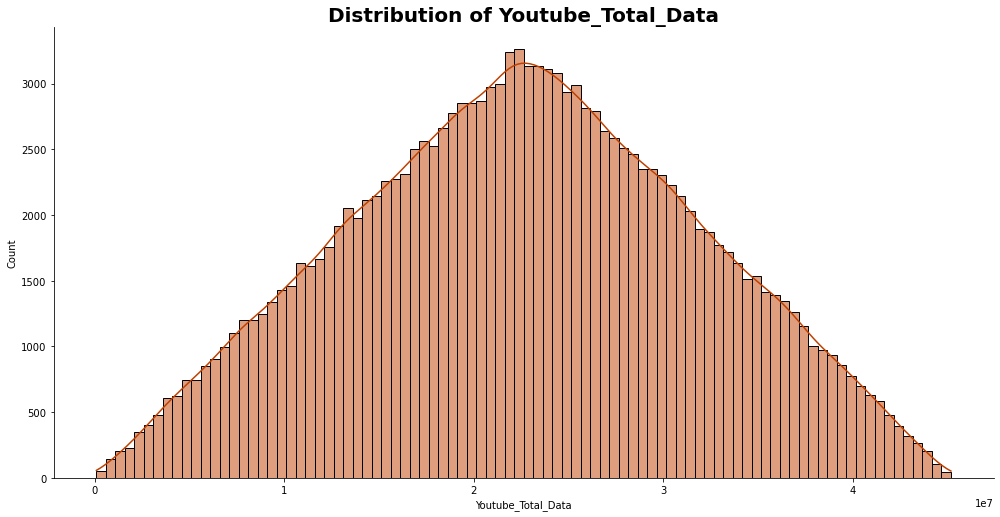

In [820]:
plot_hist(telcom, 'Youtube_Total_Data', '#C04000')

Total Netflix Data

In [821]:
telcom[['Netflix_Total_Data']].describe()

,Netflix_Total_Data
count,"148,506.00"
mean,"22,629,144.08"
std,"9,260,476.58"
min,"98,432.00"
25%,"15,980,157.50"
50%,"22,636,325.00"
75%,"29,288,322.00"
max,"45,198,153.00"


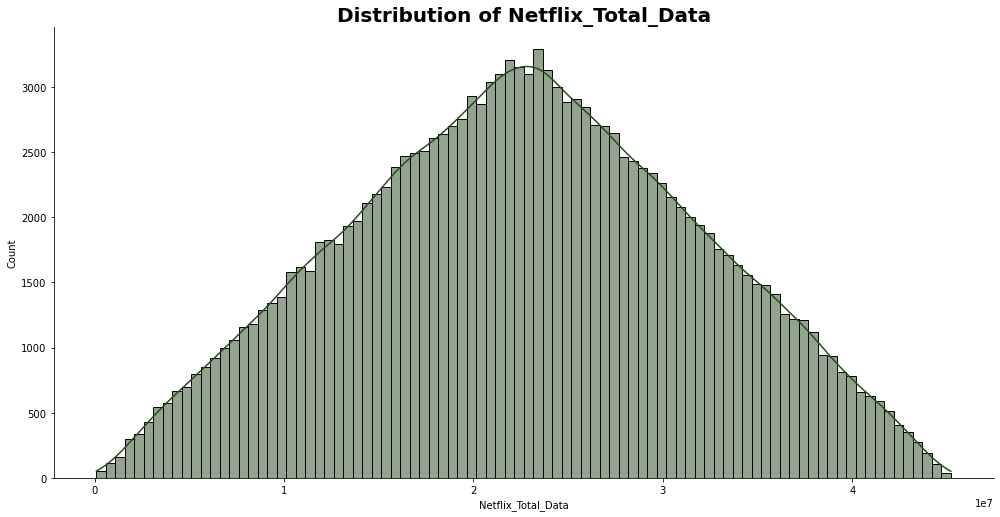

In [822]:
plot_hist(telcom, 'Netflix_Total_Data', color="#294a1f")

Total Gaming  Data

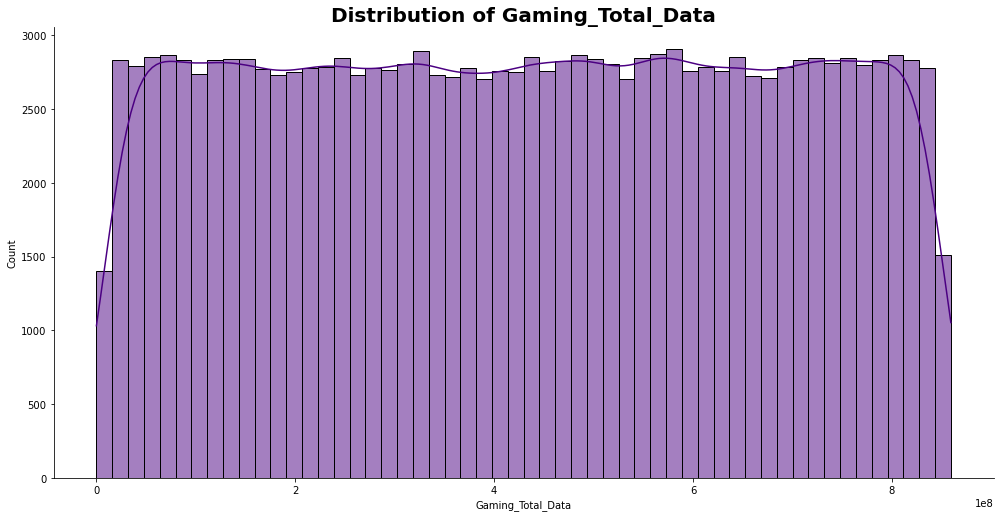

In [823]:
plot_hist(telcom, 'Gaming_Total_Data', 'indigo')

Other Total Data

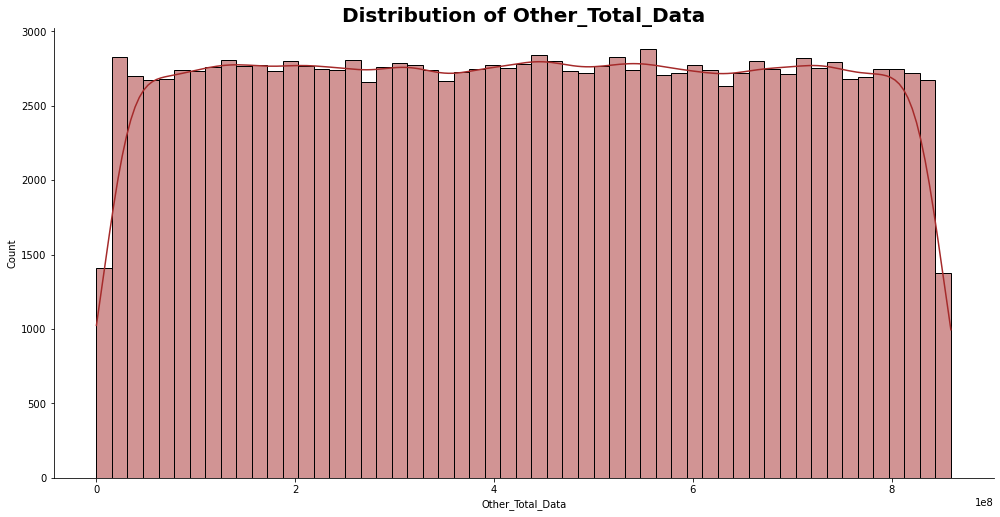

In [824]:
plot_hist(telcom, 'Other_Total_Data', '#A52A2A')

In [825]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

#### Total Aggregates of Time 

In [826]:
# Time aggregates
telcom['Start ms']=telcom['Start ms']
telcom['End ms']=telcom['End ms']
telcom['Start']=telcom['Start']
telcom['End']=telcom['End']
telcom['Avg Delay (ms)']=telcom['Avg RTT UL (ms)']+telcom['Avg RTT DL (ms)']
telcom['Dur. (ms)']=telcom['Dur. (ms)']
telcom['Dur. (ms).1']=telcom['Dur. (ms).1']
telcom["Activity_Duration(ms)"]=telcom['Activity Duration UL (ms)']+telcom['Activity Duration DL (ms)']

In [827]:
telcom.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00","36,749,741.00","480,624,086.00","345,629,377.00","18,355,943.00","2,905,912.00","3,701,304.00","1,570,185.00","17,855,187.00","292,426,453.00","180,558,843.00",47.00,"76,411.00",67.00
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00","53,800,391.00","1,180,289,203.00","707,185,356.00","39,359,124.00","4,414,096.00","937,385.00","1,933,278.00","35,565,545.00","609,920,783.00","541,959,383.00",70.00,"3,728.00",42.00
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00","27,883,638.00","690,499,923.00","307,690,973.00","34,425,237.00","10,229,119.00","3,363,124.00","1,726,277.00","23,751,202.00","229,980,251.00","414,908,351.00",123.83,0.00,15.00
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,106.20,17.63,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00","43,324,218.00","1,595,068,463.00","889,352,748.00","36,534,765.00","11,811,761.00","2,070,983.00","657,493.00","1

#### Total speed kbps of Throughput

In [828]:
# total speed kbps
telcom['Avg Throughput (kbps)']=telcom['Avg Bearer TP UL (kbps)']+telcom['Avg Bearer TP DL (kbps)']

In [829]:
telcom.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Avg Delay (ms),Activity_Duration(ms),Avg Throughput (kbps)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00","36,749,741.00","480,624,086.00","345,629,377.00","18,355,943.00","2,905,912.00","3,701,304.00","1,570,185.00","17,855,187.00","292,426,453.00","180,558,843.00",47.00,"76,411.00",67.00
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00","53,800,391.00","1,180,289,203.00","707,185,356.00","39,359,124.00","4,414,096.00","937,385.00","1,933,278.00","35,565,545.00","609,920,783.00","541,959,383.00",70.00,"3,728.00",42.00
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00","27,883,638.00","690,499,923.00","307,690,973.00","34,425,237.00","10,229,119.00","3,363,124.00","1,726,277.00","23,751,202.00","229,980,251.00","414,908,351.00",123.83,0.00,15.00
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,106.20,17.63,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00","43,324,218.00","1,595,068,463.00","889,352,748.00","36,534,765.00","11,811,761.00","2,070,983.00","657,493.00","1

### Aggregate Categorical Variables

In [830]:
# categorical Variables
telcom['Handset Manufacturer']=telcom['Handset Manufacturer']
telcom['Handset Type']=telcom['Handset Type']
telcom['Last Location Name']=telcom['Last Location Name']
telcom['IMSI']=telcom['IMSI']
telcom['IMEI']=telcom['IMEI']

In [831]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

In [832]:
data=Data_preprocess(telcom)

In [833]:
# Convert to MB

telcom["Youtube_Total_Data"] = data.convert_bytes_to_megabytes(telcom["Youtube_Total_Data"])
telcom["Google_Total_Data"] = data.convert_bytes_to_megabytes(telcom["Google_Total_Data"])
telcom['Email_Total_Data'] = data.convert_bytes_to_megabytes(telcom["Email_Total_Data"])
telcom['Social_Media_Total_Data'] = data.convert_bytes_to_megabytes(telcom["Social_Media_Total_Data"])
telcom["Netflix_Total_Data"] = data.convert_bytes_to_megabytes(telcom["Netflix_Total_Data"])
telcom['Gaming_Total_Data'] = data.convert_bytes_to_megabytes(telcom["Gaming_Total_Data"])
telcom['Other_Total_Data'] = data.convert_bytes_to_megabytes(telcom["Other_Total_Data"])
telcom['Total UL and DL'] = data.convert_bytes_to_megabytes(telcom["Total UL and DL"]) 

### Bivariate Analysis – explore the relationship between each application & the total DL+UL

In [834]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [835]:
user_ratio_usage= telcom[columns].groupby('MSISDN/Number').sum()
user_ratio_usage

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
"33,601,001,722.00",21.62,4.39,1.33,2.23,27.18,812.46,386.57,878.69
"33,601,001,754.00",12.43,5.33,3.31,2.66,11.22,119.75,281.71,156.86
"33,601,002,511.00",21.33,3.44,3.21,3.20,19.35,538.83,501.69,595.97
"33,601,007,832.00",6.98,9.68,2.28,0.28,1.94,391.13,35.28,422.32
"33,601,008,617.00",41.53,18.50,3.31,2.91,49.20,"1,314.80",804.80,"1,457.41"
...,...,...,...,...,...,...,...,...
"33,789,996,170.00",26.65,7.53,1.01,0.30,14.90,660.36,295.28,714.64
"33,789,997,247.00",19.85,5.43,2.51,0.50,8.53,437.00,211.12,480.31
"3,197,020,876,596.00",11.96,10.44,1.52,0.72,26.59,178.05,470.53,232.12


In [836]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [837]:
user_ratio_usage = telcom[apps_columns]
user_ratio_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Dur. (ms)                148506 non-null  float64
 1   MSISDN/Number            148506 non-null  float64
 2   Youtube_Total_Data       148506 non-null  float64
 3   Google_Total_Data        148506 non-null  float64
 4   Email_Total_Data         148506 non-null  float64
 5   Social_Media_Total_Data  148506 non-null  float64
 6   Netflix_Total_Data       148506 non-null  float64
 7   Gaming_Total_Data        148506 non-null  float64
 8   Other_Total_Data         148506 non-null  float64
 9   Total UL and DL          148506 non-null  float64
dtypes: float64(10)
memory usage: 11.3 MB


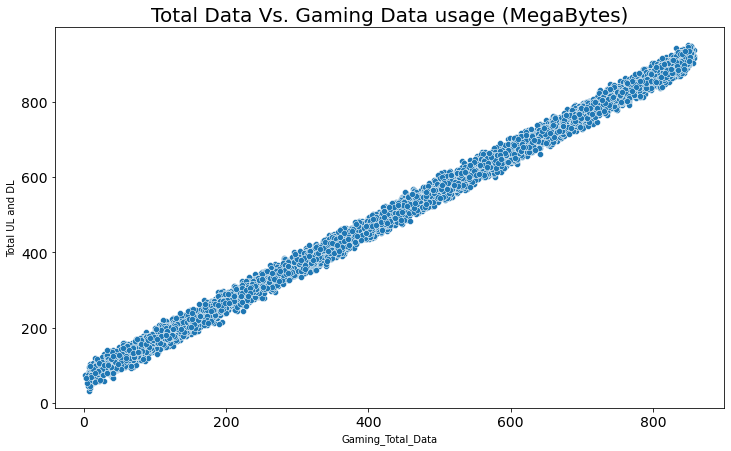

In [838]:
plot_scatter(user_ratio_usage.sample(10000), 'Gaming_Total_Data', 'Total UL and DL', 'Total Data Vs. Gaming Data usage (MegaBytes)', None, None)

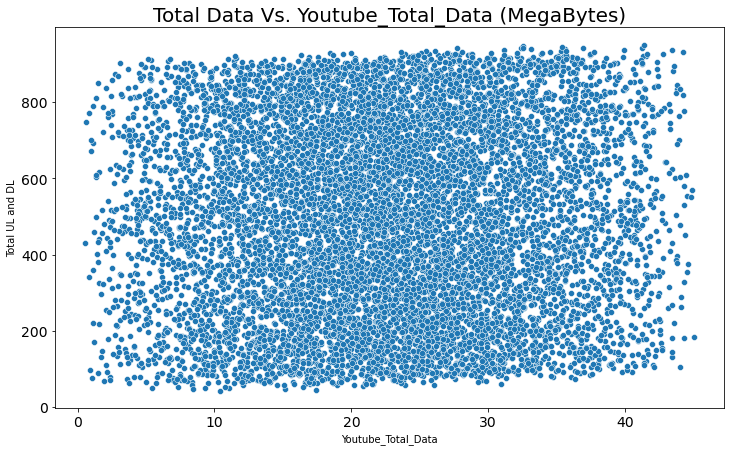

In [839]:
plot_scatter(user_ratio_usage.sample(10000), 'Youtube_Total_Data', 'Total UL and DL', 'Total Data Vs. Youtube_Total_Data (MegaBytes)', None, None)

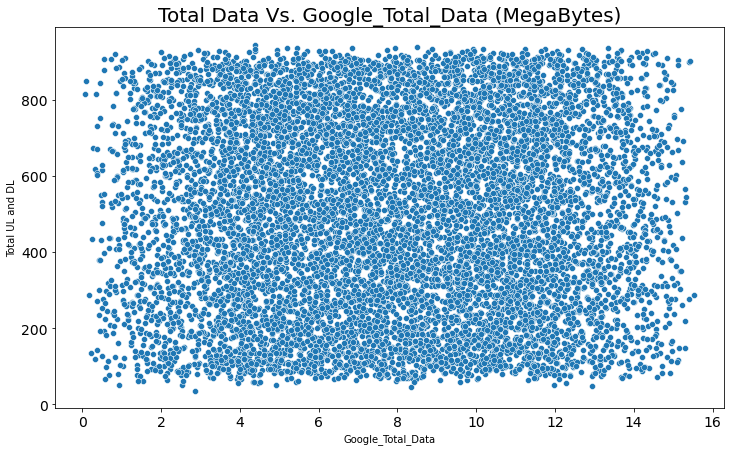

In [840]:
plot_scatter(user_ratio_usage.sample(10000), 'Google_Total_Data', 'Total UL and DL', 'Total Data Vs. Google_Total_Data (MegaBytes)', None, None)

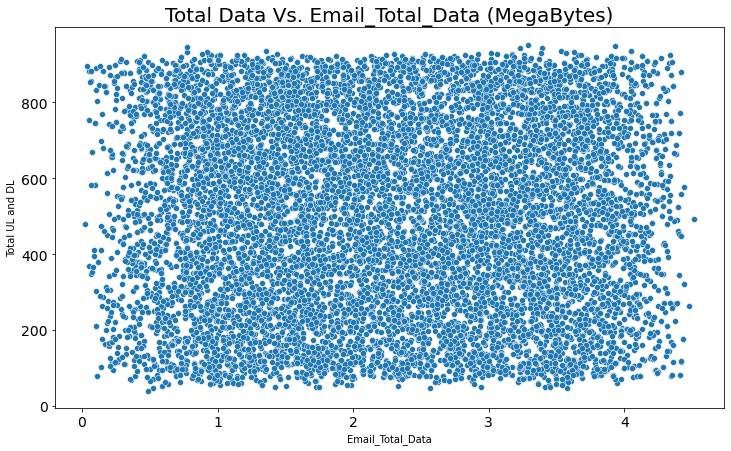

In [841]:
plot_scatter(user_ratio_usage.sample(10000), 'Email_Total_Data', 'Total UL and DL', 'Total Data Vs. Email_Total_Data (MegaBytes)', None, None)

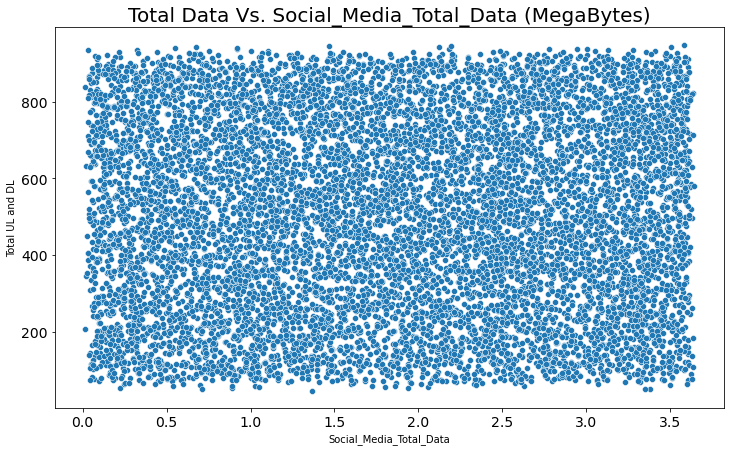

In [842]:
plot_scatter(user_ratio_usage.sample(10000), 'Social_Media_Total_Data', 'Total UL and DL', 'Total Data Vs. Social_Media_Total_Data (MegaBytes)', None, None)

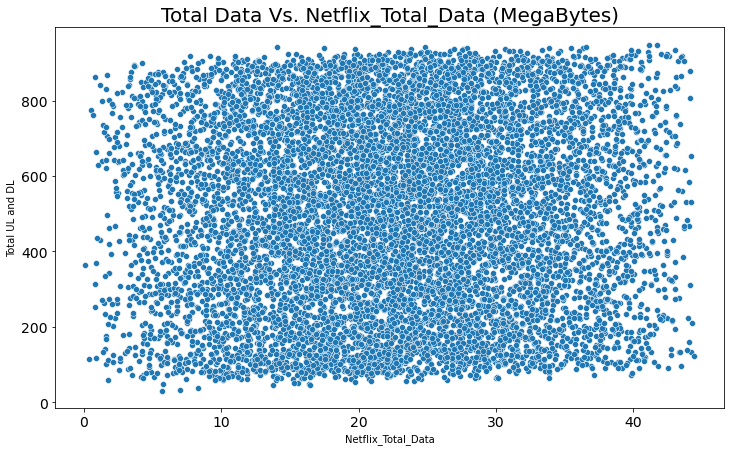

In [843]:
plot_scatter(user_ratio_usage.sample(10000), 'Netflix_Total_Data', 'Total UL and DL', 'Total Data Vs. Netflix_Total_Data (MegaBytes)', None, None)

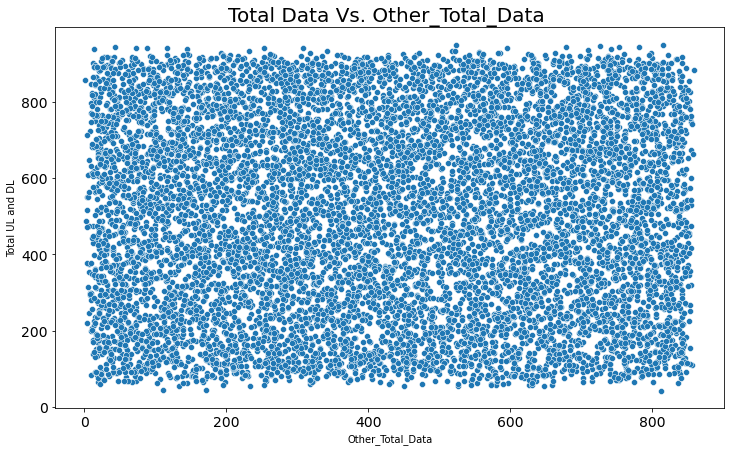

In [844]:
plot_scatter(user_ratio_usage.sample(10000), 'Other_Total_Data', 'Total UL and DL', 'Total Data Vs. Other_Total_Data ', None, None)

### Variable transformations 
- total duration for all sessions and compute the total data (DL+UL) per decile class.

In [845]:
scaled_df = user_ratio_usage[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)']]

scaled_df['Dur. (ms)'] = user_ratio_usage['Dur. (ms)']/1000
scaled_df = scaled_df.rename(columns={'Dur. (ms)': 'Duration'})

scaled_df = scaled_df.groupby('MSISDN/Number').agg({'Duration':'sum', 'Total UL and DL': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['Duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['Decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('Decile').agg({'Total UL and DL': 'sum',
                                                                                           'Duration': 'sum'})
explore_feature_df_with_decile_agg

/tmp/ipykernel_141398/1642493849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df['Dur. (ms)'] = user_ratio_usage['Dur. (ms)']/1000


,Total UL and DL,Duration
Decile,,
1st_decile,"11,529,809.16","649,838.19"
2nd_decile,"12,390,381.12","1,790,128.04"
3rd_decile,"11,657,572.48","2,144,889.37"
4th_decile,"13,931,724.62","3,442,540.69"
5th_decile,"24,117,322.93","7,578,216.37"


<Figure size 720x504 with 0 Axes>

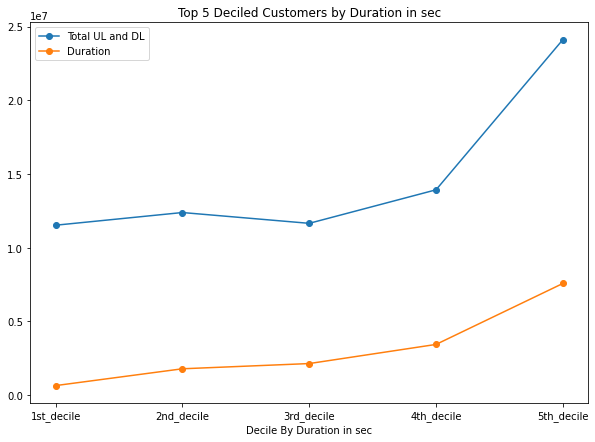

In [846]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

### Correlation Analysis

In [847]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
Youtube_Total_Data,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.03
Google_Total_Data,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.01
Email_Total_Data,-0.00,-0.00,1.00,0.00,0.00,-0.00,-0.00,0.00
Social_Media_Total_Data,0.00,-0.00,0.00,1.00,0.00,0.00,0.01,0.01
Netflix_Total_Data,0.00,-0.00,0.00,0.00,1.00,-0.00,-0.01,0.03
Gaming_Total_Data,-0.00,-0.00,-0.00,0.00,-0.00,1.00,-0.00,1.00
Other_Total_Data,0.00,-0.00,-0.00,0.01,-0.01,-0.00,1.00,-0.00
Total UL and DL,0.03,0.01,0.00,0.01,0.03,1.00,-0.00,1.00


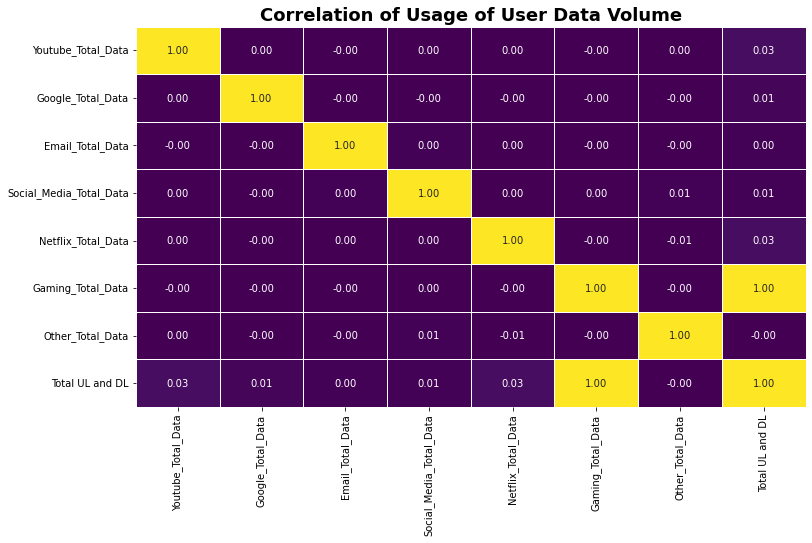

In [848]:
plot_heatmap(corr, "Correlation of Usage of User Data Volume")

### Dimensionality Reduction

In [858]:
numeric_df = user_ratio_usage.select_dtypes(include='float64') 

In [859]:
numeric_df

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
0,"1,823,652.00","33,664,962,239.00",18.36,2.91,3.70,1.57,17.86,292.43,180.56,345.63
1,"1,365,104.00","33,681,854,413.00",39.36,4.41,0.94,1.93,35.57,609.92,541.96,707.19
2,"1,361,762.00","33,760,627,129.00",34.43,10.23,3.36,1.73,23.75,229.98,414.91,307.69
3,"1,321,509.00","33,750,343,200.00",36.53,11.81,2.07,0.66,15.09,810.39,761.84,889.35
4,"1,089,009.00","33,699,795,932.00",34.22,7.75,2.11,0.91,17.54,531.24,564.62,607.68
...,...,...,...,...,...,...,...,...,...,...
148501,"59,587.00","33,668,648,496.00",24.55,1.27,4.28,0.99,29.62,797.16,336.27,872.76
148502,"81,230.00","33,650,688,697.00",27.96,12.78,0.69,3.52,37.56,535.81,16.75,631.80
148503,"97,970.00","33,663,449,963.00",22.17,4.42,2.12,2.35,40.64,631.63,714.64,705.78
148504,"98,249.00","33,621,890,103.00",24.52,6.59,2.06,1.26,15.03,566.93,132.42,627.70


In [864]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [865]:
scaled_data = scaler.transform(numeric_df)

In [868]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [869]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

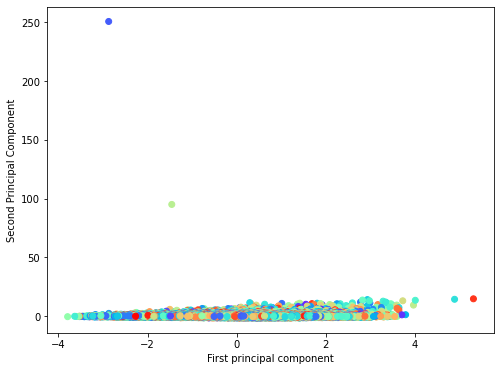

In [875]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Cumulative explained variance')

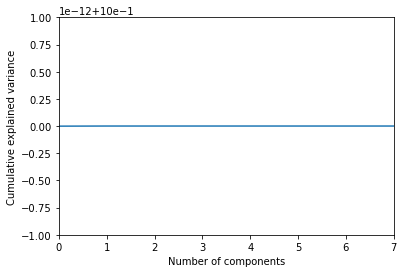

In [860]:
# compare pca number of components with logistic regression algorithm for classification
from sklearn.decomposition import PCA
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [862]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(numeric_df)
Y_sklearn

array([[-8.24157954e+09,  1.71857466e+06,  2.07838235e+02,
        -2.48091790e+02,  1.05490697e+01, -9.14129809e-01],
       [-8.22468737e+09,  1.26002665e+06, -2.72281772e+02,
         1.14801707e+02, -3.04350945e+01,  1.70356910e+00],
       [-8.14591465e+09,  1.25668458e+06,  2.78357691e+02,
        -1.44478300e+01, -1.29992106e+01,  6.59986788e+00],
       ...,
       [-8.24309182e+09, -7.10733602e+03, -2.89704660e+02,
         2.86367632e+02, -1.24663181e+01, -1.31544902e+01],
       [-8.28465168e+09, -6.82830188e+03, -1.91048679e+02,
        -2.96245538e+02,  5.38499955e+00,  6.78996683e+00],
       [-8.28691972e+09, -7.16730160e+03,  1.21427112e+02,
         3.86215115e+02,  1.53801274e+01,  2.96229316e-01]])

In [ ]:
# Create a clean user overview file in CSV format

user_ratio_usage.to_csv('../data/user_overview_data.csv',index=False)